In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import csv
import pickle
import seaborn as sns
from sklearn import decomposition
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
sns.set(color_codes=True)
%matplotlib inline 
# Import necessary modules
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
data_frame = pd.read_csv("/content/drive/MyDrive/hemolysis/FVs-Merged-Labled-pos_neg.csv")

In [4]:
data_frame.shape

(1220, 155)

In [5]:
data_frame.head(5)

F0       F1         F2          F3  ...    F151  F152  Positive  Nagetive
0   2246    17529     178835     2053029  ...    1360     0         0         1
1    165      478       1678        6640  ...       0     0         1         0
2  68662  2861239  157505727  9749775799  ...  961917     0         0         1
3   5711    68981    1079211    18972389  ...    6281     0         1         0
4  22549   545235   17457523   630421305  ...   67594     0         0         1

[5 rows x 155 columns]

In [ ]:
data_frame.tail(5)

F0      F1       F2         F3  ...   F151  F152  Positive  Nagetive
1215   6089   77699  1307517   24736595  ...   2992     0         0         1
1216  15484  310865  8215659  244135211  ...  34106     0         0         1
1217   9648  152909  3207793   75957437  ...   9292     0         0         1
1218   3383   33740   435248    6330560  ...   1996     0         0         1
1219   2450   20825   228305    2804927  ...    592     0         0         1

[5 rows x 155 columns]

In [ ]:
print (data_frame.isnull().values.any())

False


In [ ]:
def plot_corr(data_frame, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        data_frame: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = data_frame.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks


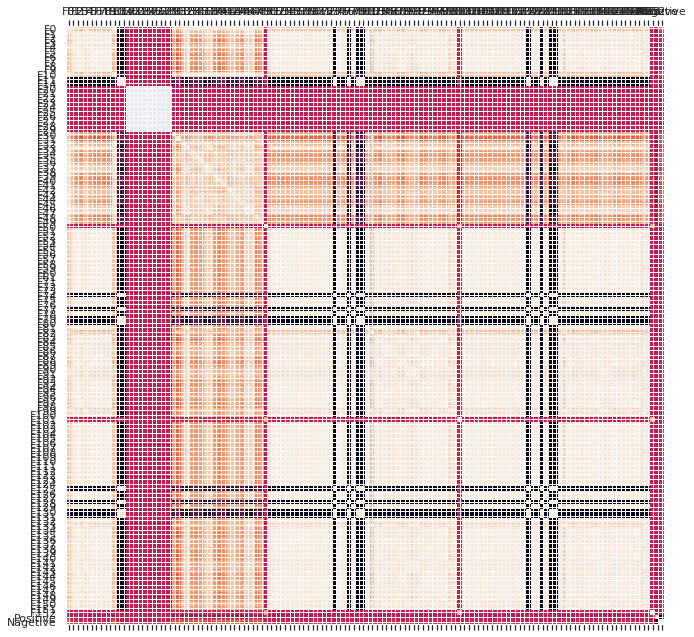

In [ ]:
plot_corr(data_frame)

In [ ]:
data_frame.corr()

F0        F1        F2  ...      F152  Positive  Nagetive
F0        1.000000  0.908076  0.791089  ...  0.046730 -0.276826  0.276826
F1        0.908076  1.000000  0.972170  ...  0.021502 -0.115870  0.115870
F2        0.791089  0.972170  1.000000  ...  0.006966 -0.050965  0.050965
F3        0.724730  0.939656  0.993246  ...  0.001470 -0.029806  0.029806
F4        0.906963  0.999956  0.972568  ...  0.021071 -0.114466  0.114466
...            ...       ...       ...  ...       ...       ...       ...
F150      0.850569  0.981911  0.969927  ...  0.016337 -0.070058  0.070058
F151      0.805992  0.974834  0.992513  ...  0.010886 -0.053994  0.053994
F152      0.046730  0.021502  0.006966  ...  1.000000  0.005260 -0.005260
Positive -0.276826 -0.115870 -0.050965  ...  0.005260  1.000000 -1.000000
Nagetive  0.276826  0.115870  0.050965  ... -0.005260 -1.000000  1.000000

[130 rows x 130 columns]

Check class distribution
Rare events are hard to predict

In [ ]:
num_obs = len(data_frame)
num_true = len(data_frame.loc[data_frame['Positive'] == 1])
print(num_true)

num_false = len(data_frame.loc[data_frame['Nagetive'] == 1])

print(num_false)

print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, ((1.00 * num_true)/(1.0 * num_obs)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (( 1.0 * num_false)/(1.0 * num_obs)) * 100))

329
891
Number of True cases:  329 (26.97%)
Number of False cases: 891 (73.03%)


**Spliting the data**
70% for training, 30% for testing



In [6]:
#from sklearn.cross_validation import train_test_split

#feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['Positive','Nagetive']

# Separating out the target
y = data_frame.loc[:,['Positive']].values

df2 = data_frame.drop(['Positive','Nagetive'], axis=1)
df2.reset_index(inplace=True)
# Separating out the features
x = df2.values
#print(x)

# Standardizing the features
x = StandardScaler().fit_transform(x)


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


In [7]:
# evaluate a logistic regression model using k-fold cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

# train models
import sklearn.metrics as metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
loocv = model_selection.LeaveOneOut()






from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}



# XGBClassifier
model1 = XGBClassifier(random_state=42)
# knn
model2 = KNeighborsClassifier(n_neighbors=4)
#SVC
model3 = SVC(kernel='linear', C=1, random_state=42,probability=True)
#RandomForestClassifier
model4 = RandomForestClassifier(random_state=42)
#AdaBoostClassifier
model5 = AdaBoostClassifier(random_state=42)
#DecisionTreeClassifier
model6 = DecisionTreeClassifier(random_state=42)
#MLPClassifier
model7 =MLPClassifier (hidden_layer_sizes=(13,13,13),max_iter=500, random_state=42)

training_start = time.perf_counter()
 #for model 1 XGB

training_start = time.perf_counter()
cv = KFold(random_state=42)
# evaluate model

scores1 = cross_validate(model1, x, y, scoring=scoring, cv=loocv, n_jobs=-1, return_train_score=True)
print(scores1.keys())

print(scores1['test_accuracy']) 
print('Accuracy: %.3f (%.3f)' % (mean(scores1['test_accuracy']), std(scores1['test_accuracy'])))

print(scores1['fit_time'])
print('fit_time: %.3f (%.3f)' % (mean(scores1['fit_time']), std(scores1['fit_time'])))


print(scores1['test_precision'])
print('test_precision: %.3f (%.3f)' % (mean(scores1['test_precision']), std(scores1['test_precision'])))


print(scores1['train_precision'])
print('train_precision: %.3f (%.3f)' % (mean(scores1['train_precision']), std(scores1['train_precision'])))


print(scores1['test_f1_score'])
print('test_f1_score: %.3f (%.3f)' % (mean(scores1['test_f1_score']), std(scores1['test_f1_score'])))

print(scores1['train_f1_score'])
print('train_f1_score: %.3f (%.3f)' % (mean(scores1['train_f1_score']), std(scores1['train_f1_score'])))

print(scores1['test_recall'])
print('test_recall: %.3f (%.3f)' % (mean(scores1['test_recall']), std(scores1['test_recall'])))

print(scores1['train_recall'])
print('train_recall: %.3f (%.3f)' % (mean(scores1['train_recall']), std(scores1['train_recall'])))

training_end = time.perf_counter()
model_train_time = training_end-training_start
print("Time consumed for testing xgboost in independent test: %4.3f" % (model_train_time))


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1_score', 'train_f1_score'])
[1. 1. 1. ... 1. 1. 1.]
Accuracy: 0.938 (0.242)
[2.50532818 2.52156878 1.27971935 ... 1.26741838 1.25118351 1.08772993]
fit_time: 1.269 (0.056)
[0. 1. 0. ... 0. 0. 0.]
test_precision: 0.233 (0.423)
[0.99693252 0.99386503 0.99388379 ... 0.99388379 0.99392097 0.99392097]
train_precision: 0.994 (0.001)
[0. 1. 0. ... 0. 0. 0.]
test_f1_score: 0.233 (0.423)
[0.99236641 0.99082569 0.99085366 ... 0.99085366 0.99392097 0.99392097]
train_f1_score: 0.991 (0.002)
[0. 1. 0. ... 0. 0. 0.]
test_recall: 0.233 (0.423)
[0.98784195 0.98780488 0.98784195 ... 0.98784195 0.99392097 0.99392097]
train_recall: 0.988 (0.003)
Time consumed for testing xgboost in independent test: 786.358


In [8]:
#for model 2 KNN

training_start = time.perf_counter()
#cv = KFold(n_splits=10, random_state=42, shuffle=True)
# evaluate model

scores2 = cross_validate(model2, x, y, scoring=scoring, cv=loocv, n_jobs=-1, return_train_score=True)
print(scores2.keys())

print(scores2['test_accuracy']) 
print('Accuracy: %.3f (%.3f)' % (mean(scores2['test_accuracy']), std(scores2['test_accuracy'])))

print(scores2['fit_time'])
print('fit_time: %.3f (%.3f)' % (mean(scores2['fit_time']), std(scores2['fit_time'])))

print(scores2['test_recall'])
print('test_recall: %.3f (%.3f)' % (mean(scores2['test_recall']), std(scores2['test_recall'])))


print(scores2['test_precision'])
print('test_precision: %.3f (%.3f)' % (mean(scores2['test_precision']), std(scores2['test_precision'])))


print(scores2['test_f1_score'])
print('test_f1_score: %.3f (%.3f)' % (mean(scores2['test_f1_score']), std(scores2['test_f1_score'])))


training_end = time.perf_counter()
model_train_time = training_end-training_start
print("Time consumed for testing KNN in independent test: %4.3f" % (model_train_time))

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1_score', 'train_f1_score'])
[0. 1. 1. ... 1. 1. 1.]
Accuracy: 0.920 (0.272)
[0.02092767 0.01828194 0.01913428 ... 0.017488   0.0176301  0.02794528]
fit_time: 0.018 (0.003)
[0. 1. 0. ... 0. 0. 0.]
test_recall: 0.217 (0.412)
[0. 1. 0. ... 0. 0. 0.]
test_precision: 0.217 (0.412)
[0. 1. 0. ... 0. 0. 0.]
test_f1_score: 0.217 (0.412)
Time consumed for testing KNN in independent test: 218.676


In [9]:
#for model 3 SVM

training_start = time.perf_counter()
#cv = KFold(n_splits=10, random_state=42, shuffle=True)
# evaluate model

scores3 = cross_validate(model3, x, y, scoring=scoring, cv=loocv, n_jobs=-1, return_train_score=True)
print(scores3.keys())

print(scores3['test_accuracy']) 
print('Accuracy: %.3f (%.3f)' % (mean(scores3['test_accuracy']), std(scores3['test_accuracy'])))

print(scores3['fit_time'])
print('fit_time: %.3f (%.3f)' % (mean(scores3['fit_time']), std(scores3['fit_time'])))

print(scores3['test_recall'])
print('test_recall: %.3f (%.3f)' % (mean(scores3['test_recall']), std(scores3['test_recall'])))


print(scores3['test_precision'])
print('test_precision: %.3f (%.3f)' % (mean(scores3['test_precision']), std(scores3['test_precision'])))


print(scores3['test_f1_score'])
print('test_f1_score: %.3f (%.3f)' % (mean(scores3['test_f1_score']), std(scores3['test_f1_score'])))

training_end = time.perf_counter()
model_train_time = training_end-training_start
print("Time consumed for testing SVM in independent test: %4.3f" % (model_train_time))

training_end = time.perf_counter()
model_train_time = training_end-training_start
print("Time consumed for testing SVM in independent test: %4.3f" % (model_train_time))


dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1_score', 'train_f1_score'])
[0. 1. 1. ... 1. 1. 1.]
Accuracy: 0.921 (0.269)
[0.52941155 0.52593875 0.51984191 ... 0.50230718 0.50898886 0.43621469]
fit_time: 0.523 (0.014)
[0. 1. 0. ... 0. 0. 0.]
test_recall: 0.235 (0.424)
[0. 1. 0. ... 0. 0. 0.]
test_precision: 0.235 (0.424)
[0. 1. 0. ... 0. 0. 0.]
test_f1_score: 0.235 (0.424)
Time consumed for testing SVM in independent test: 368.937
Time consumed for testing SVM in independent test: 368.937


In [10]:
#for model 4=RF

training_start = time.perf_counter()
#cv = KFold(n_splits=10, random_state=42, shuffle=True)
# evaluate model

scores4 = cross_validate(model4, x, y, scoring=scoring, cv=loocv, n_jobs=-1, return_train_score=True)
print(scores4.keys())

print(scores4['test_accuracy']) 
print('Accuracy: %.3f (%.3f)' % (mean(scores4['test_accuracy']), std(scores4['test_accuracy'])))

print(scores4['fit_time'])
print('fit_time: %.3f (%.3f)' % (mean(scores4['fit_time']), std(scores4['fit_time'])))

print(scores4['test_recall'])
print('test_recall: %.3f (%.3f)' % (mean(scores4['test_recall']), std(scores4['test_recall'])))


print(scores4['test_precision'])
print('test_precision: %.3f (%.3f)' % (mean(scores4['test_precision']), std(scores4['test_precision'])))


print(scores4['test_f1_score'])
print('test_f1_score: %.3f (%.3f)' % (mean(scores4['test_f1_score']), std(scores4['test_f1_score'])))

training_end = time.perf_counter()
model_train_time = training_end-training_start
print("Time consumed for testing RF in independent test: %4.3f" % (model_train_time))

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1_score', 'train_f1_score'])
[1. 1. 1. ... 1. 1. 1.]
Accuracy: 0.924 (0.265)
[0.78459239 0.77889585 0.7773664  ... 0.77672124 0.77037096 0.75685239]
fit_time: 0.786 (0.016)
[0. 1. 0. ... 0. 0. 0.]
test_recall: 0.204 (0.403)
[0. 1. 0. ... 0. 0. 0.]
test_precision: 0.204 (0.403)
[0. 1. 0. ... 0. 0. 0.]
test_f1_score: 0.204 (0.403)
Time consumed for testing RF in independent test: 510.938


In [11]:
#for model 5= Adaboost

training_start = time.perf_counter()
#cv = KFold(n_splits=10, random_state=42, shuffle=True)
# evaluate model

scores5 = cross_validate(model5, x, y, scoring=scoring, cv=loocv, n_jobs=-1, return_train_score=True)
print(scores5.keys())

print(scores5['test_accuracy']) 
print('Accuracy: %.3f (%.3f)' % (mean(scores5['test_accuracy']), std(scores5['test_accuracy'])))

print(scores5['fit_time'])
print('fit_time: %.3f (%.3f)' % (mean(scores5['fit_time']), std(scores5['fit_time'])))

print(scores5['test_recall'])
print('test_recall: %.3f (%.3f)' % (mean(scores5['test_recall']), std(scores5['test_recall'])))


print(scores5['test_precision'])
print('test_precision: %.3f (%.3f)' % (mean(scores5['test_precision']), std(scores5['test_precision'])))


print(scores5['test_f1_score'])
print('test_f1_score: %.3f (%.3f)' % (mean(scores5['test_f1_score']), std(scores5['test_f1_score'])))

training_end = time.perf_counter()
model_train_time = training_end-training_start
print("Time consumed for testing adaboost in independent test: %4.3f" % (model_train_time))


dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1_score', 'train_f1_score'])
[1. 1. 1. ... 1. 1. 1.]
Accuracy: 0.934 (0.248)
[1.10520148 1.10879683 1.11244202 ... 1.1201272  1.09503245 0.89958382]
fit_time: 1.105 (0.017)
[0. 1. 0. ... 0. 0. 0.]
test_recall: 0.234 (0.424)
[0. 1. 0. ... 0. 0. 0.]
test_precision: 0.234 (0.424)
[0. 1. 0. ... 0. 0. 0.]
test_f1_score: 0.234 (0.424)
Time consumed for testing adaboost in independent test: 716.083


In [12]:
#for model 6= DT

training_start = time.perf_counter()
#cv = KFold(n_splits=10, random_state=42, shuffle=True)
# evaluate model

scores6 = cross_validate(model6, x, y, scoring=scoring, cv=loocv, n_jobs=-1, return_train_score=True)
print(scores6.keys())

print(scores6['test_accuracy']) 
print('Accuracy: %.3f (%.3f)' % (mean(scores6['test_accuracy']), std(scores6['test_accuracy'])))

print(scores6['fit_time'])
print('fit_time: %.3f (%.3f)' % (mean(scores6['fit_time']), std(scores6['fit_time'])))

print(scores6['test_recall'])
print('test_recall: %.3f (%.3f)' % (mean(scores6['test_recall']), std(scores6['test_recall'])))


print(scores6['test_precision'])
print('test_precision: %.3f (%.3f)' % (mean(scores6['test_precision']), std(scores6['test_precision'])))


print(scores6['test_f1_score'])
print('test_f1_score: %.3f (%.3f)' % (mean(scores6['test_f1_score']), std(scores6['test_f1_score'])))

training_end = time.perf_counter()
model_train_time = training_end-training_start
print("Time consumed for testing DT in independent test: %4.3f" % (model_train_time))


dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1_score', 'train_f1_score'])
[1. 1. 1. ... 1. 1. 1.]
Accuracy: 0.900 (0.300)
[0.08454895 0.08395481 0.08474088 ... 0.08151245 0.08130169 0.07965827]
fit_time: 0.084 (0.004)
[0. 1. 0. ... 0. 0. 0.]
test_recall: 0.221 (0.415)
[0. 1. 0. ... 0. 0. 0.]
test_precision: 0.221 (0.415)
[0. 1. 0. ... 0. 0. 0.]
test_f1_score: 0.221 (0.415)
Time consumed for testing DT in independent test: 57.655


In [13]:
#for model 7= NN

training_start = time.perf_counter()
#cv = KFold(n_splits=10, random_state=42, shuffle=True)
# evaluate model

scores7 = cross_validate(model7, x, y, scoring=scoring, cv=loocv, n_jobs=-1, return_train_score=True)
print(scores7.keys())

print(scores7['test_accuracy']) 
print('Accuracy: %.3f (%.3f)' % (mean(scores7['test_accuracy']), std(scores7['test_accuracy'])))

print(scores7['fit_time'])
print('fit_time: %.3f (%.3f)' % (mean(scores7['fit_time']), std(scores7['fit_time'])))

print(scores7['test_recall'])
print('test_recall: %.3f (%.3f)' % (mean(scores7['test_recall']), std(scores7['test_recall'])))


print(scores7['test_precision'])
print('test_precision: %.3f (%.3f)' % (mean(scores7['test_precision']), std(scores7['test_precision'])))


print(scores7['test_f1_score'])
print('test_f1_score: %.3f (%.3f)' % (mean(scores7['test_f1_score']), std(scores7['test_f1_score'])))

training_end = time.perf_counter()
model_train_time = training_end-training_start
print("Time consumed for testing NN in independent test: %4.3f" % (model_train_time))


dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1_score', 'train_f1_score'])
[0. 1. 1. ... 1. 1. 1.]
Accuracy: 0.939 (0.240)
[1.71682549 2.83224177 1.70107698 ... 3.29368114 3.2744348  2.74905634]
fit_time: 2.654 (0.552)
[0. 1. 0. ... 0. 0. 0.]
test_recall: 0.239 (0.427)
[0. 1. 0. ... 0. 0. 0.]
test_precision: 0.239 (0.427)
[0. 1. 0. ... 0. 0. 0.]
test_f1_score: 0.239 (0.427)
Time consumed for testing NN in independent test: 1628.090


In [14]:
#for model XGBOOST
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
xgb_predict_test = cross_val_predict(model1, x, y, cv=loocv)
y_test=y
tp, fp, fn, tn = confusion_matrix(y, xgb_predict_test, labels=[1, 0]).ravel()

np.random.seed(7)
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y_test, xgb_predict_test), 5)
print([tp, fp, tn, fn, acc, sp, sn, mcc])
self_scores=[]
self_scores.append([tp, fp, tn, fn, acc, sp, sn, mcc])
std_scale = StandardScaler().fit(x)
pickle.dump(model1, open('./iphosd_Model.pkl', 'wb'))
pickle.dump(std_scale, open('./iphosd_Scale.pkl', 'wb'))

print('\n\nResults are Saved in XGBOOST-crossvalidation test.csv')
with open('./Results are Saved in XGBOOST-crossvalidation test.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['crossvalidation for xgboost'])
    resultwriter.writerow(
        ['True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity',
         'MCC'])
    resultwriter.writerow(self_scores[0])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[284, 45, 860, 31, 93.77, 95.03, 90.16, 0.84006]


Results are Saved in XGBOOST-crossvalidation test.csv


In [15]:
#for model KNN
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
knn_predict_test = cross_val_predict(model2, x, y, cv=loocv)
y_test=y
tp, fp, fn, tn = confusion_matrix(y, knn_predict_test, labels=[1, 0]).ravel()

np.random.seed(7)
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y_test, knn_predict_test), 5)
print([tp, fp, tn, fn, acc, sp, sn, mcc])
self_scores=[]
self_scores.append([tp, fp, tn, fn, acc, sp, sn, mcc])
std_scale = StandardScaler().fit(x)
pickle.dump(model2, open('./iphosd_Model.pkl', 'wb'))
pickle.dump(std_scale, open('./iphosd_Scale.pkl', 'wb'))

print('\n\nResults are Saved in knn-crossvalidation test.csv')
with open('./Results are Saved in knn-crossvalidation test.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['crossvalidation for knn'])
    resultwriter.writerow(
        ['True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity',
         'MCC'])
    resultwriter.writerow(self_scores[0])

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when

[265, 64, 857, 34, 91.97, 93.05, 88.63, 0.79167]


Results are Saved in knn-crossvalidation test.csv


In [16]:
#for model SVM=3
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
svm_predict_test = cross_val_predict(model3, x, y, cv=loocv)
y_test=y
tp, fp, fn, tn = confusion_matrix(y, svm_predict_test, labels=[1, 0]).ravel()

np.random.seed(7)
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y_test, svm_predict_test), 5)
print([tp, fp, tn, fn, acc, sp, sn, mcc])
self_scores=[]
self_scores.append([tp, fp, tn, fn, acc, sp, sn, mcc])
std_scale = StandardScaler().fit(x)
pickle.dump(model3, open('./iphosd_Model.pkl', 'wb'))
pickle.dump(std_scale, open('./iphosd_Scale.pkl', 'wb'))

print('\n\nResults are Saved in svm-crossvalidation test.csv')
with open('./Results are Saved in svm-crossvalidation test.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['crossvalidation for svm'])
    resultwriter.writerow(
        ['True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity',
         'MCC'])
    resultwriter.writerow(self_scores[0])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[287, 42, 837, 54, 92.13, 95.22, 84.16, 0.80275]


Results are Saved in svm-crossvalidation test.csv


In [17]:
#for model RF=4
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
rf_predict_test = cross_val_predict(model4, x, y, cv=loocv)
y_test=y
tp, fp, fn, tn = confusion_matrix(y, rf_predict_test, labels=[1, 0]).ravel()

np.random.seed(7)
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y_test, rf_predict_test), 5)
print([tp, fp, tn, fn, acc, sp, sn, mcc])
self_scores=[]
self_scores.append([tp, fp, tn, fn, acc, sp, sn, mcc])
std_scale = StandardScaler().fit(x)
pickle.dump(model4, open('./iphosd_Model.pkl', 'wb'))
pickle.dump(std_scale, open('./iphosd_Scale.pkl', 'wb'))

print('\n\nResults are Saved in RF-crossvalidation test.csv')
with open('./Results are Saved in RF-crossvalidation test.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['crossvalidation for RF'])
    resultwriter.writerow(
        ['True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity',
         'MCC'])
    resultwriter.writerow(self_scores[0])

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 

[249, 80, 878, 13, 92.38, 91.65, 95.04, 0.80214]


Results are Saved in RF-crossvalidation test.csv


In [18]:
#for model adabost=5
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
adabost_predict_test = cross_val_predict(model5, x, y, cv=loocv)
y_test=y
tp, fp, fn, tn = confusion_matrix(y, adabost_predict_test, labels=[1, 0]).ravel()

np.random.seed(7)
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y_test, adabost_predict_test), 5)
print([tp, fp, tn, fn, acc, sp, sn, mcc])
self_scores=[]
self_scores.append([tp, fp, tn, fn, acc, sp, sn, mcc])
std_scale = StandardScaler().fit(x)
pickle.dump(model5, open('./iphosd_Model.pkl', 'wb'))
pickle.dump(std_scale, open('./iphosd_Scale.pkl', 'wb'))

print('\n\nResults are Saved in adabost-crossvalidation test.csv')
with open('./Results are Saved in adabost-crossvalidation test.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['crossvalidation for adabost'])
    resultwriter.writerow(
        ['True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity',
         'MCC'])
    resultwriter.writerow(self_scores[0])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[286, 43, 854, 37, 93.44, 95.21, 88.54, 0.83263]


Results are Saved in adabost-crossvalidation test.csv


In [19]:
#for model DT=6
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
dt_predict_test = cross_val_predict(model6, x, y, cv=loocv)
y_test=y
tp, fp, fn, tn = confusion_matrix(y, dt_predict_test, labels=[1, 0]).ravel()

np.random.seed(7)
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y_test, dt_predict_test), 5)
print([tp, fp, tn, fn, acc, sp, sn, mcc])
self_scores=[]
self_scores.append([tp, fp, tn, fn, acc, sp, sn, mcc])
std_scale = StandardScaler().fit(x)
pickle.dump(model6, open('./iphosd_Model.pkl', 'wb'))
pickle.dump(std_scale, open('./iphosd_Scale.pkl', 'wb'))

print('\n\nResults are Saved in DT-crossvalidation test.csv')
with open('./Results are Saved in DT-crossvalidation test.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['crossvalidation for DT'])
    resultwriter.writerow(
        ['True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity',
         'MCC'])
    resultwriter.writerow(self_scores[0])

[270, 59, 828, 63, 90.0, 93.35, 81.08, 0.74712]


Results are Saved in DT-crossvalidation test.csv


In [20]:
#for model NN7
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
nn_predict_test = cross_val_predict(model7, x, y, cv=loocv)
y_test=y
tp, fp, fn, tn = confusion_matrix(y, nn_predict_test, labels=[1, 0]).ravel()

np.random.seed(7)
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y_test, nn_predict_test), 5)
print([tp, fp, tn, fn, acc, sp, sn, mcc])
self_scores=[]
self_scores.append([tp, fp, tn, fn, acc, sp, sn, mcc])
std_scale = StandardScaler().fit(x)
pickle.dump(model7, open('./iphosd_Model.pkl', 'wb'))
pickle.dump(std_scale, open('./iphosd_Scale.pkl', 'wb'))

print('\n\nResults are Saved in NN-crossvalidation test.csv')
with open('./Results are Saved in NN-crossvalidation test.csv', 'w', newline='') as csvfile:
    resultwriter = csv.writer(csvfile, delimiter=',', quotechar='|')
    resultwriter.writerow(['crossvalidation for NN'])
    resultwriter.writerow(
        ['True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity',
         'MCC'])
    resultwriter.writerow(self_scores[0])

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d

[292, 37, 853, 38, 93.85, 95.84, 88.48, 0.84408]


Results are Saved in NN-crossvalidation test.csv


In [21]:
# fit model
model1.fit( x, y.ravel())
model2.fit( x, y.ravel())
model3.fit( x, y.ravel())
model4.fit( x, y.ravel())
model5.fit( x, y.ravel())
model6.fit( x, y.ravel())
model7.fit( x, y.ravel())


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [22]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
pred_prob1 = cross_val_predict(model1, x, y.ravel(), cv=cv, method='predict_proba')
fpr1, tpr1, thresh1 = roc_curve(y.ravel(), pred_prob1[:,1], pos_label=1)

pred_prob2 = cross_val_predict(model2, x, y.ravel(), cv=cv, method='predict_proba')
fpr2, tpr2, thresh2 = roc_curve(y.ravel(), pred_prob2[:,1], pos_label=1)

pred_prob3 = cross_val_predict(model3, x, y.ravel(), cv=cv, method='predict_proba')
fpr3, tpr3, thresh3 = roc_curve(y.ravel(), pred_prob3[:,1], pos_label=1)

pred_prob4 = cross_val_predict(model4, x, y.ravel(), cv=cv, method='predict_proba')
fpr4, tpr4, thresh4 = roc_curve(y.ravel(), pred_prob4[:,1], pos_label=1)

pred_prob5 = cross_val_predict(model5, x, y.ravel(), cv=cv, method='predict_proba')
fpr5, tpr5, thresh5 = roc_curve(y.ravel(), pred_prob5[:,1], pos_label=1)

pred_prob6 = cross_val_predict(model6, x, y.ravel(), cv=cv, method='predict_proba')
fpr6, tpr6, thresh6 = roc_curve(y.ravel(), pred_prob6[:,1], pos_label=1)

pred_prob7 = cross_val_predict(model7, x, y.ravel(), cv=cv, method='predict_proba')
fpr7, tpr7, thresh7 = roc_curve(y.ravel(), pred_prob7[:,1], pos_label=1)


In [23]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y.ravel(), pred_prob1[:,1])
auc_score2 = roc_auc_score(y.ravel(), pred_prob2[:,1])
auc_score3 = roc_auc_score(y.ravel(), pred_prob3[:,1])
auc_score4 = roc_auc_score(y.ravel(), pred_prob4[:,1])
auc_score5 = roc_auc_score(y.ravel(), pred_prob5[:,1])
auc_score6 = roc_auc_score(y.ravel(), pred_prob6[:,1])
auc_score7 = roc_auc_score(y.ravel(), pred_prob7[:,1])

print(auc_score1, auc_score2,auc_score3,auc_score4,auc_score5,auc_score6,auc_score7)
i=6,
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

0.9623813276295545 0.9614210323430181 0.9546051531867135 0.9657449196456289 0.9391397937497228 0.8249226476176831 0.9579516884481424


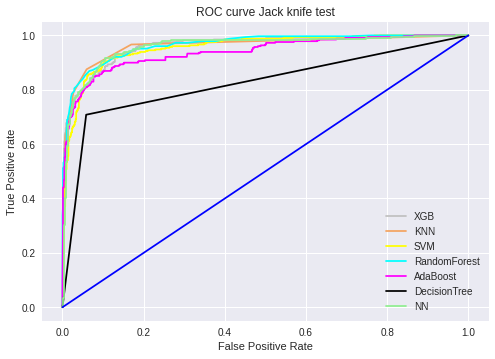

In [27]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='solid',color='silver', label='XGB')
plt.plot(fpr2, tpr2, linestyle='solid',color='sandybrown', label='KNN')
plt.plot(fpr3, tpr3, linestyle='solid',color='yellow', label='SVM')
plt.plot(fpr4, tpr4, linestyle='solid',color='cyan', label='RandomForest')
plt.plot(fpr5, tpr5, linestyle='solid',color='magenta', label='AdaBoost')
plt.plot(fpr6, tpr6, linestyle='solid',color='black', label='DecisionTree')
plt.plot(fpr7, tpr7, linestyle='solid',color='lightgreen', label='NN')
plt.plot(p_fpr, p_tpr, linestyle='solid', color='blue')
# title
plt.title('ROC curve Jack knife test')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC curve Jack knife test',dpi=300)
plt.show();

In [ ]:
# model1 XGBClassifier
# model2 knn

#model3 SVM

# model4 RandomForestClassifier

# model5 AdaBoostClassifier

# model6 DecisionTreeClassifier

# model7 MLPClassifier

